## Importing Libraries

In [1]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
from scipy import ndimage

## Calculating DFT

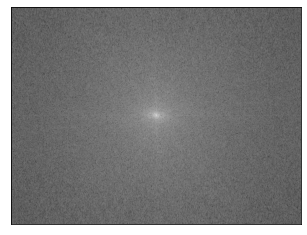

In [10]:
img = iio.imread('P3.jpg')
F = np.fft.fftshift(np.fft.fft2(img))

def scale(img):
    '''
    A function for scaling image between 0 and 255.
    '''
    return np.uint8((img-np.min(img))/(np.max(img)-np.min(img))*255)

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()

show_image(scale(20*np.log10(np.abs(F)+1e-3)), save=True, name='Q3_1.jpg')

## Calculating Power Spectral Density

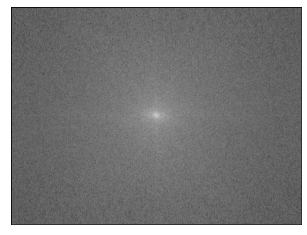

In [11]:
Sf = np.abs(F)**2

show_image(scale(20*np.log10(Sf+1e-3)), save=True, name='Q3_2.jpg')

## Adding Noise 

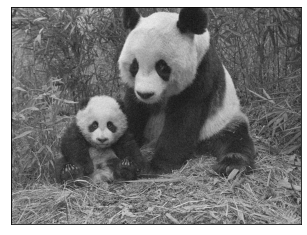

In [5]:
sigma = 10
corrupted = scale(img.copy() + np.random.normal(0, sigma, size=img.shape))

show_image(corrupted, save=True, name='corrupted.jpg')

## Creating Wiener Filter

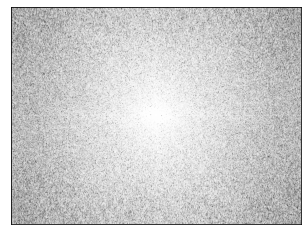

In [7]:
N = 2e6
Wiener = 1 / (1 + N*sigma**2/Sf)

show_image(scale(20*np.log10(np.abs(Wiener)+1e-3)), save=True, name='Q3_3.jpg')

## Estimating $\hat{F}(u,v)$

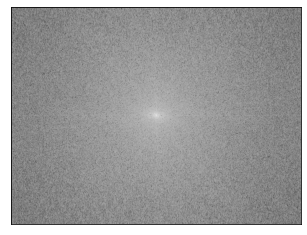

In [12]:
F_hat = Wiener*np.fft.fftshift(np.fft.fft2(corrupted))

show_image(scale(20*np.log10(np.abs(F_hat)+1e-3)), save=True, name='Q3_4.jpg')

## Estimating $\hat{f}(x,y)$

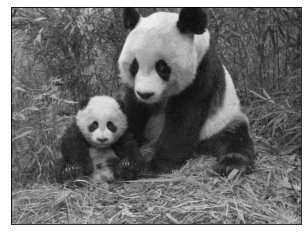

In [13]:
f_hat = np.fft.ifft2(np.fft.ifftshift(F_hat))
f_hat = scale(f_hat.real)

show_image(f_hat, save=True, name='Q3_5.jpg')

## Point Spread Function

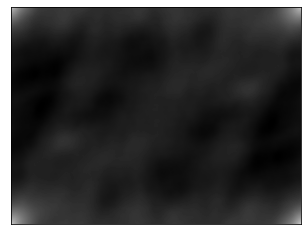

In [14]:
N = 1e12
Wiener = 1 / (1 + N*sigma**2/Sf)
h = np.fft.ifft2(np.fft.ifftshift(Wiener))
h = scale(h.real)

show_image(h, save=True, name='Q3_6.jpg')